# write time breakdown

In [1]:
from sc23_utils import *
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
df_fig16 = pd.read_csv('23-07-09_fig16-wpx.tsv', sep='\t', header=[0,1], index_col=0)
df_fig16

method     NoComp                    AmReX                 AMRIC (SZ-L/R)  \
blocksize     512    1024     2048     512    1024    2048            512   
I/O time    1.169  10.478  106.694  61.553  62.721  76.103          1.143   
prep. time  0.310   1.499    0.926   0.820   7.162  19.339          0.455   

method                    AMRIC (SZ-Interp)                
blocksize    1024    2048               512   1024   2048  
I/O time    3.294  12.227             1.128  2.586  9.390  
prep. time  1.542   0.906             0.567  1.687  0.842

In [3]:
df_fig17 = pd.read_csv('23-07-09_fig17-nyx.tsv', sep='\t', header=[0,1], index_col=0)
df_fig17

method     NoComp              AmReX              AMRIC (SZ-L/R)               \
blocksize     256   512   1024   256   512   1024            256   512   1024   
I/O time     0.73  4.20  44.72  2.09  6.94  91.45           0.56  3.93  38.24   
prep. time   0.17  0.18   0.57  0.55  1.77  14.87           0.13  0.21   0.45   

method     AMRIC (SZ-Interp)               
blocksize                256   512   1024  
I/O time                0.42  3.98  39.73  
prep. time              0.14  0.12   0.46

In [4]:
method_names = df_fig16.columns.get_level_values(0).unique()
num_axes = len(method_names)

In [5]:
def draw_plot(df):
    fig, axes = plt.subplots(ncols=4, figsize=(6, 3), sharey=True)
    width = 0.5
    
    for ax, method in zip(axes.flat, method_names):
        names = df[method].columns
        num_cols = len(df[method].columns)
    
        below = df[method].loc['I/O time']
        above = df[method].loc['prep. time']
    
        stack = np.zeros(3)
        p = ax.bar(names, below, width, label='I/O time', bottom=stack, color='lightgray')
        stack += below
        p = ax.bar(names, above, width, label='Prep.', bottom=stack, color='RoyalBlue')
        ax.set_title(method)
    
        ax.set_axisbelow(True)
        ax.grid(which='major', color='black', axis='y', lw=0.5)
        ax.grid(which='minor', color='silver', axis='y', lw=0.3)
        for direction, tf in (('left', False), ('right', False), ('top', True), ('bottom', True)):
            ax.spines[direction].set_visible(tf)
    
        ax.tick_params(axis='both', which='both', length=0) # disable the black ticks
    
    axes.flat[0].set_ylabel("Time (Seconds)")
    axes.flat[-1].legend()

    return fig, axes
    

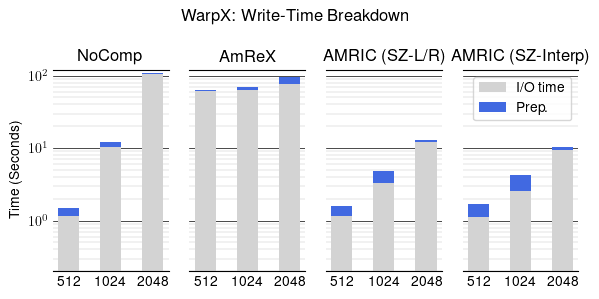

In [6]:
fig, axes = draw_plot(df_fig16)
axes[0].set_yscale('log')
axes[0].set_ylim((0.2, 120))
fig.suptitle("WarpX"+ ": Write-Time Breakdown")
fig.tight_layout()
fig.savefig("23-07-10_warpx-time.pdf")

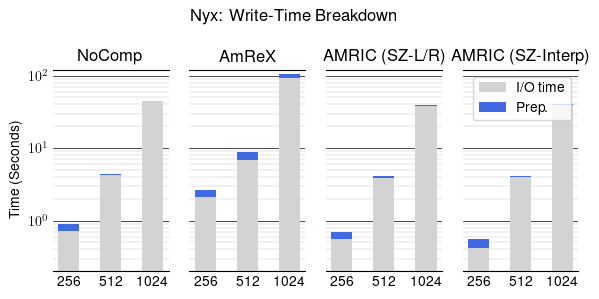

In [145]:
fig, axes = draw_plot(df_fig17)
axes[0].set_yscale('log')
axes[0].set_ylim((0.2, 120))
fig.suptitle("Nyx"+ ": Write-Time Breakdown")
fig.tight_layout()
fig.savefig("23-07-10_myx-time.pdf")

In [146]:
rate_distort_tac = pd.read_csv('23-07-10_rate-distort_tac.tsv', sep='\t', header=None, index_col=0)
rate_distort_tac

1      2      3      4      5      6      7       8       9   \
0                                                                        
cr     23.62  29.70  36.27  43.50  51.27  72.47  95.12  118.27  141.06   
psnr  100.69  94.71  91.32  89.07  87.48  85.03  83.65   82.79   82.19   

          10      11      12      13      14      15      16      17  
0                                                                     
cr    162.78  183.80  203.74  222.51  240.08  257.17  273.08  288.06  
psnr   81.76   81.42   81.15   80.93   80.74   80.58   80.44   80.31

In [147]:
rate_distort_amric = pd.read_csv('23-07-10_rate-distort_amric.tsv', sep='\t', header=None, index_col=0)
rate_distort_amric

1      2      3      4      5       6       7       8       9   \
0                                                                         
cr    24.27  31.65  40.07  49.18  57.70  103.28  140.88  171.06  207.57   
psnr  99.87  94.47  91.61  89.86  88.81   86.16   85.07   84.40   83.69   

          10      11      12      13      14  
0                                             
cr    218.08  237.01  259.21  268.78  293.94  
psnr   83.50   83.16   82.77   82.61   82.20

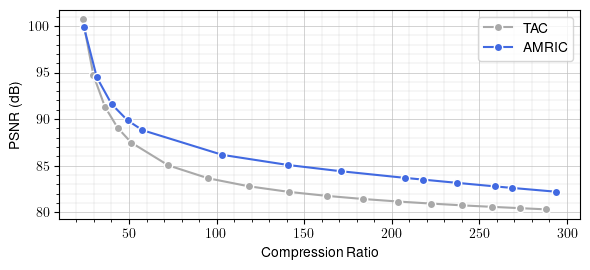

In [148]:
fig, ax = plt.subplots(figsize=(6, 2.8))

ax.plot(
    rate_distort_tac.loc["cr"],
    rate_distort_tac.loc["psnr"],
    marker="o",
    markerfacecolor="darkgray",
    markeredgecolor="white",
    color="darkgray",
    label="TAC",
)
ax.plot(
    rate_distort_amric.loc["cr"],
    rate_distort_amric.loc["psnr"],
    marker="o",
    markerfacecolor="RoyalBlue",
    markeredgecolor="white",
    color="RoyalBlue",
    label="AMRIC",
)

ax.set_ylabel("PSNR (dB)")
ax.set_xlabel("Compression Ratio")
ax.legend()
ax.set_axisbelow(True)
# ax.grid(which='major', color='black', axis='y', lw=0.5)
# ax.grid(which='minor', color='silver', axis='y', lw=0.3)
ax.grid(which="major", color="silver", lw=0.5)
ax.grid(which="minor", color="silver", lw=0.2, ls="-")
plt.minorticks_on()

fig.tight_layout()
fig.savefig('23-07-10_rate-distort.pdf')